🔗 **Summary Notes**: [Day_02_KnnComplexity.md](../Notes/Day_02_KnnComplexity.md)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Keys of Cancer dataset: {}".format(cancer.keys()))

Keys of Cancer dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Shape of cancer dataset: {}".format(cancer['data'].shape))
print("\nfeatures of cancer dataset:\n{}".format(cancer['feature_names']))
print("\nshape of target dataset: {}".format(cancer['target'].shape))
print("\nName of target: {}".format(cancer['target_names']))

Shape of cancer dataset: (569, 30)

features of cancer dataset:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

shape of target dataset: (569,)

Name of target: ['malignant' 'benign']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
#trying neighbors for knn model from 1 to 10
neighbors_settings = range(1,11)
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
    #building the model setting parameters
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

print(training_accuracy)
print(test_accuracy)

[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


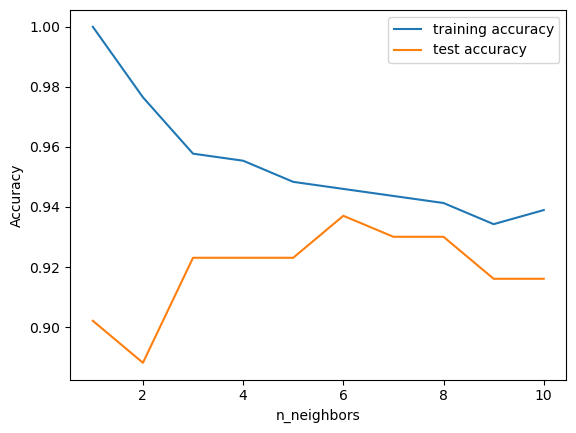

In [6]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()